# Lobsters Logistic Redux
Let's return to the lobster problem, but this I'd like you to use logistic regression to find the solution.  First, the data:

In [3]:
data

array([[-1.95598033,  0.        ],
       [-1.95598033,  0.        ],
       [-1.95598033,  0.        ],
       [-1.95598033,  0.        ],
       [-1.95598033,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  0.        ],
       [-1.51484434,  1.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,  0.        ],
       [-1.07370835,

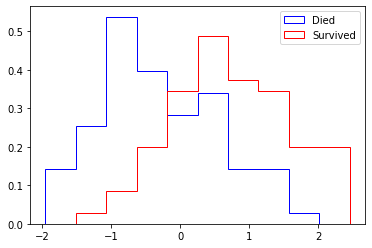

In [72]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('datasets/lobster_survive.dat',skiprows=1)
X,Y = data.T
X -= X.mean()
X /= X.std()

bins = np.unique(X)
plt.hist(X[Y==0],bins,histtype='step',density=True,label='Died',color='blue')
plt.hist(X[Y==1],bins,histtype='step',density=True,label='Survived',color='red')
plt.legend()
plt.show()

We would still like to know
$$
P(\text{Survive}=1|\text{Length}=x),
$$
where $\text{Survive}$ is a variable indicating whether the lobster survived or not, and $\text{Length}$ is the length of the lobster ($x\in\mathcal{R}$).  

In logistic regression, we will approach this directly by implementing logistic regression, where we model
$$
P(\text{Survive}=1|\text{Length}=x) = \sigma(\Phi \mathbf{w}).
$$
First implement the logistic function
$$
\sigma(z) = \frac{1}{1 + \mathrm{exp}(-z)}
$$

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Next, define the log-posterior function
$$
\mathcal{L}(\mathbf{w};\mathbf{X}_{obs},\mathbf{Y}_{obs}) = \sum_{i=1}^m Y_{obs,i} \ln \sigma(\Phi_i \mathbf{w}) + (1-Y_{obs,i}) \ln (1-\sigma(\Phi_i \mathbf{w})) - \lambda \mathbf{w}^T \mathbf{w} 
$$

In [61]:
def L(w,X,Y):
    m = len(X)
    l = 0
    Phi = np.array([[X[j]**i for i in range(len(w))] for j in range(m)])
    for i in range(m):
        l += Y[i]*np.log(sigmoid(Phi[i]@w)) + (1-Y[i])*np.log(1-sigmoid(Phi[i]@w))
    
    return l - (1)*w.T@w

We currently lack the tools necessary to minimize this function elegantly, but we can attack it using brute force.  Make the assumption that 
$$
Y_{obs,i} = w_0 + w_1 X_{obs,i}.
$$
Using either a grid-search approach (check out numpy.meshgrid) or a random sampling approach, search for the values of $\mathbf{w}$ that maximizes this likelihood function.  Plot all computed values of $\mathcal{L}(\mathbf{w})$ as a function of $\mathbf{w}$.  Useful commands for this plotting if you take the grid search approach might be plt.contourf.  For the random sampling approach, you might try plt.scatter (using the c= keyword argument).


In [123]:
nx, ny = (100, 100)
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
xv, yv = np.meshgrid(x, y)



In [124]:
l = np.array([[L(np.array([x[i],y[j]]),X,Y) for i in range(len(x))]for j in range(len(y))])

In [50]:
# Develop a method to find the best values of w_0 and w_1.  

<function matplotlib.pyplot.show(close=None, block=None)>

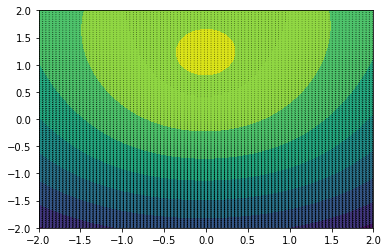

In [128]:

plt.contourf(xv,yv,l)
plt.quiver(xv,yv,gL[:,:,0],gL[:,:,1])
plt.show

In [65]:
best = np.unravel_index(np.argmax(l, axis=None), l.shape)
best

(79, 49)

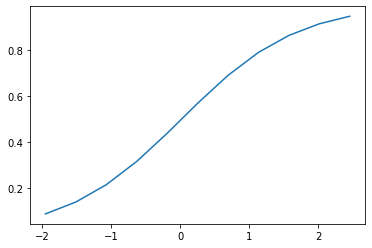

In [82]:
plt.plot(X,sigmoid(x[best[1]]+y[best[0]]*X))

Using this best parameter set, plot lobster survival as a function of length.  

In [11]:
#! Plot lobster survival 

As a final bonus round, check out the matplotlib function plt.quiver, which is a useful command for plotting gradients (in 2D).  The gradient of the log-posterior function is 
$$
\nabla_\mathbf{w} \mathcal{L} = \sum_{i=1}^m \left[ (\mathbf{Y}_{obs,i} - \sigma(\Phi_i \mathbf{w})) \Phi_i\right] - \lambda\mathbf{w}^T. 
$$
Use the quiver command to produce a plot visualizing the gradient of the log-posterior.  Given this information, can you determine a more efficient way than brute force to find the maximum value of $\mathcal{L}(\mathbf{w}$?

In [12]:
#! use plt.quiver to visualize the gradients of the log-posterior.

In [126]:
def gL(w,X,Y):
    gL = 0
    m = len(X)
    Phi = np.array([[X[j]**i for i in range(len(w))] for j in range(m)])
    # print(Phi.shape)
    for i in range(m):
        gL += (Y[i] - sigmoid(Phi[i]@w))*Phi[i]
    return gL - (1)*w.T

In [127]:
gL = np.array([[gL(np.array([x[i],y[j]]),X,Y) for i in range(len(x))]for j in range(len(y))])

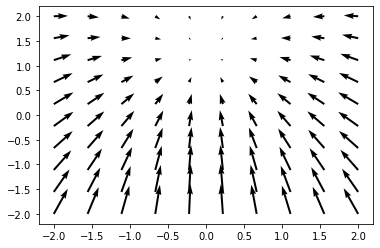

In [119]:
plt.quiver(xv,yv,gL[:,:,0],gL[:,:,1])